In [23]:
import pandas as pd
import numpy as np

### 1.1 데이터 불러오기

In [24]:
data = pd.read_csv("data.csv")

### 1.2 데이터 확인

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [26]:
data.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [27]:
data.shape

(1216553, 13)

In [28]:
data.isnull().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

### 1.3 불필요한 행 삭제

In [29]:
data = data.loc[data.city=="서울특별시"]
data.reset_index(drop=True, inplace = True)

### 1.4 변수 이름 바꾸기

In [30]:
data.rename(columns = {"transaction_real_price":"price"}, inplace = True)

### 1.5 불필요한 변수 삭제

In [31]:
data.drop(["transaction_id", "apartment_id", "jibun", "city"], axis = 1, inplace = True)

### 1.6 연/월 뽑기

In [32]:
data["transaction_year"], data["transaction_month"] = data.transaction_year_month // 100 ,data.transaction_year_month % 100

### 1.7 필요 연도 뽑기

In [33]:
data = data.loc[data["transaction_year"] >= 2012,]
data.reset_index(drop=True, inplace = True)

# 2. 데이터 시각화

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1 거래가격 분포 확인

Text(0.5, 0, 'Price')

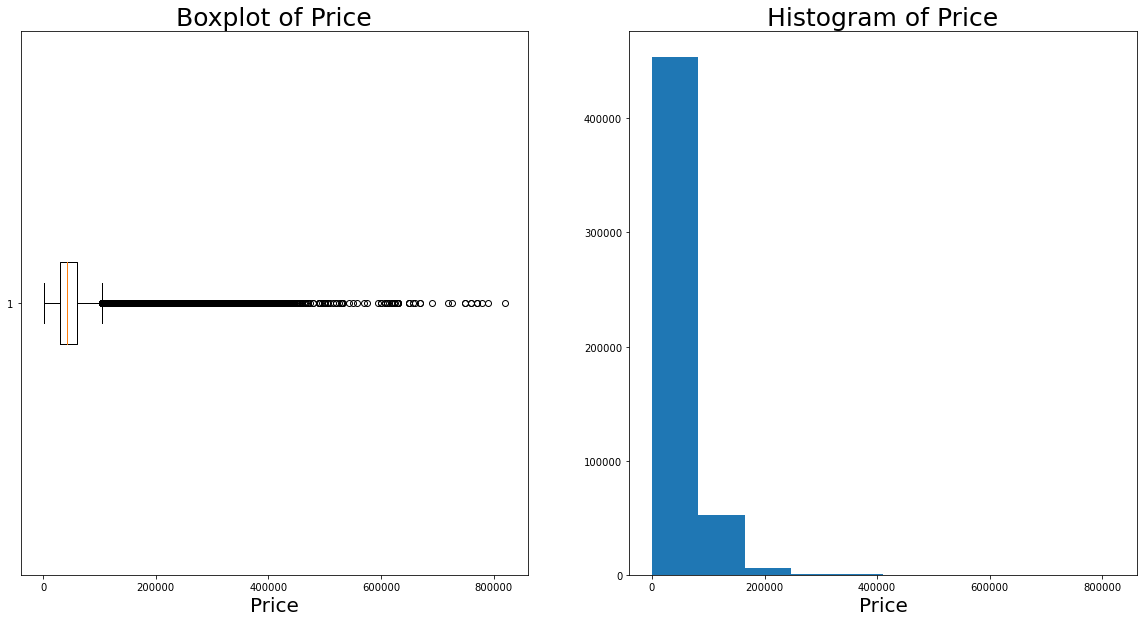

In [35]:
firstplot = plt.figure(figsize = (20,10))
axes1 = firstplot.add_subplot(1,2,1)
axes2 = firstplot.add_subplot(1,2,2)

axes1.boxplot(data.price, vert = False)
axes1.set_title("Boxplot of Price", size = 25)
axes1.set_xlabel("Price", size = 20)
axes2.hist(data["price"])
axes2.set_title("Histogram of Price", size = 25)
axes2.set_xlabel("Price", size = 20)

눈에 띄는 점은 이상치가 많이 보인다는 점이다. 대부분의 가격분포는 200000 아래로 형성되어 있다.

C:\Users\whoe9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\whoe9\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Histogram of Price'), Text(0.5, 0, 'Price')]

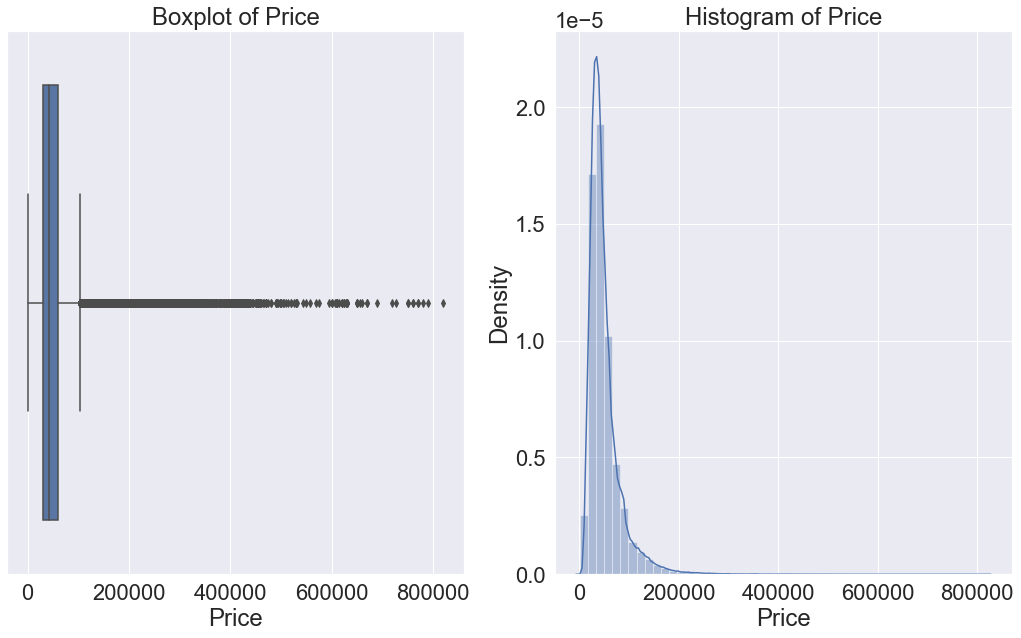

In [36]:
sns.set(font_scale = 2)
fig, axs = plt.subplots(ncols = 2, figsize = (18,10))
sns.boxplot(data["price"], ax = axs[0]).set(title = "Boxplot of Price", xlabel = "Price")
sns.distplot(data["price"], ax = axs[1]).set(title = "Histogram of Price", xlabel = "Price")

대부분의 집들은 집값이 상대적으로 낮은 쪽에 분포해있다. 하지만 집값이 매우 높은, 이상치로 여겨질만한 관측치들이 존재한다.

### 2.2 연도별 거래량 / 연도별 가격 분포

[Text(0.5, 1.0, 'Price barplot by year'), Text(0.5, 0, 'transaction_year')]

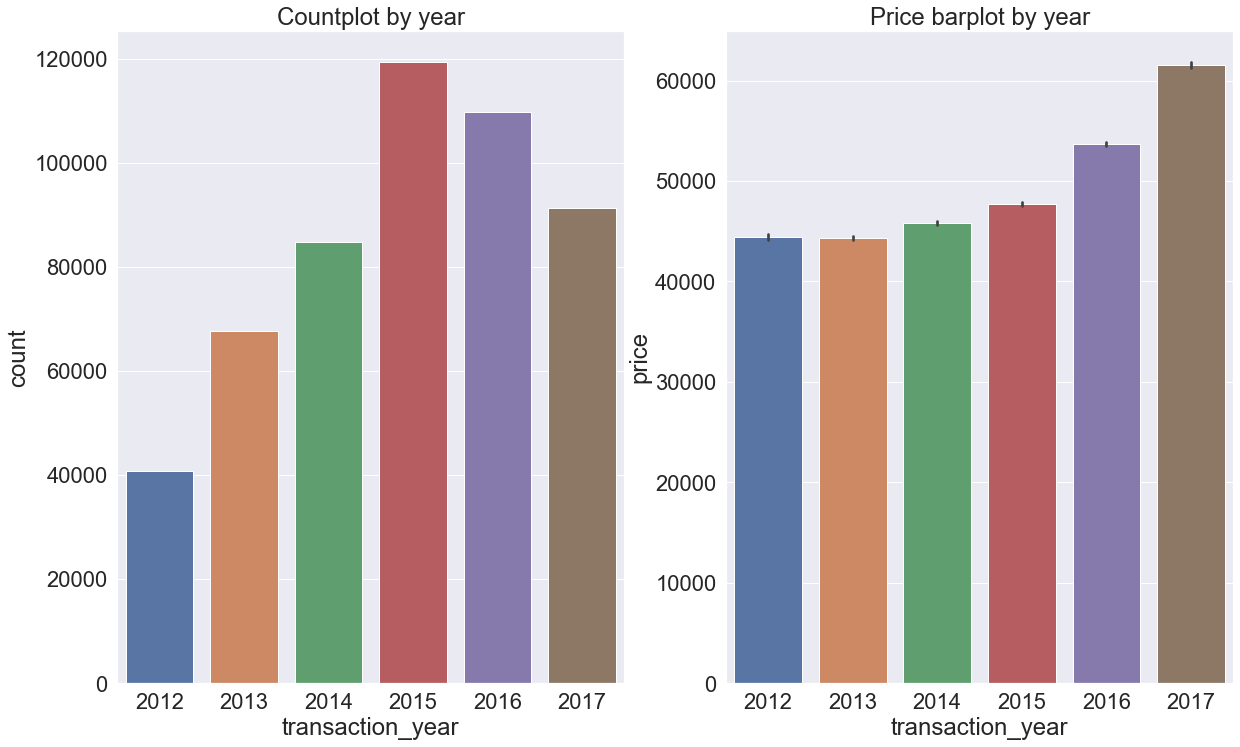

In [37]:

fig, axs = plt.subplots(ncols = 2, figsize = (20,12))
sns.countplot(data = data, x="transaction_year", ax = axs[0]).set(title = "Countplot by year", xlabel = "transaction_year")
sns.barplot(data = data, x="transaction_year", y="price", ax = axs[1]).set(title = "Price barplot by year", xlabel = "transaction_year")

부동산 거래량은 2012년부터 2015년까지 계속적으로 증가하는 추세였다가 2016년부터는 하락 하는 추세이다. 이를 오른쪽 플랏과 연관지어 생각해보면 2016년부터 전년대비 집값 상승률이 높아져서 부동산 거래가 줄었다고도 생각해 볼 수 있다.

### 2.3 층별 거래량 분포 / 층별 가격 분포

[Text(0.5, 1.0, 'Price plot by floor'),
 [Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, ''),
  Text(12, 0, ''),
  Text(13, 0, ''),
  Text(14, 0, ''),
  Text(15, 0, ''),
  Text(16, 0, ''),
  Text(17, 0, ''),
  Text(18, 0, ''),
  Text(19, 0, ''),
  Text(20, 0, ''),
  Text(21, 0, ''),
  Text(22, 0, ''),
  Text(23, 0, ''),
  Text(24, 0, ''),
  Text(25, 0, ''),
  Text(26, 0, ''),
  Text(27, 0, ''),
  Text(28, 0, ''),
  Text(29, 0, ''),
  Text(30, 0, ''),
  Text(31, 0, ''),
  Text(32, 0, ''),
  Text(33, 0, ''),
  Text(34, 0, ''),
  Text(35, 0, ''),
  Text(36, 0, ''),
  Text(37, 0, ''),
  Text(38, 0, ''),
  Text(39, 0, ''),
  Text(40, 0, ''),
  Text(41, 0, ''),
  Text(42, 0, ''),
  Text(43, 0, ''),
  Text(44, 0, ''),
  Text(45, 0, ''),
  Text(46, 0, ''),
  Text(47, 0, ''),
  Text(48, 0, ''),
  Text(49, 0, ''),
  Text(50, 0, ''),
 

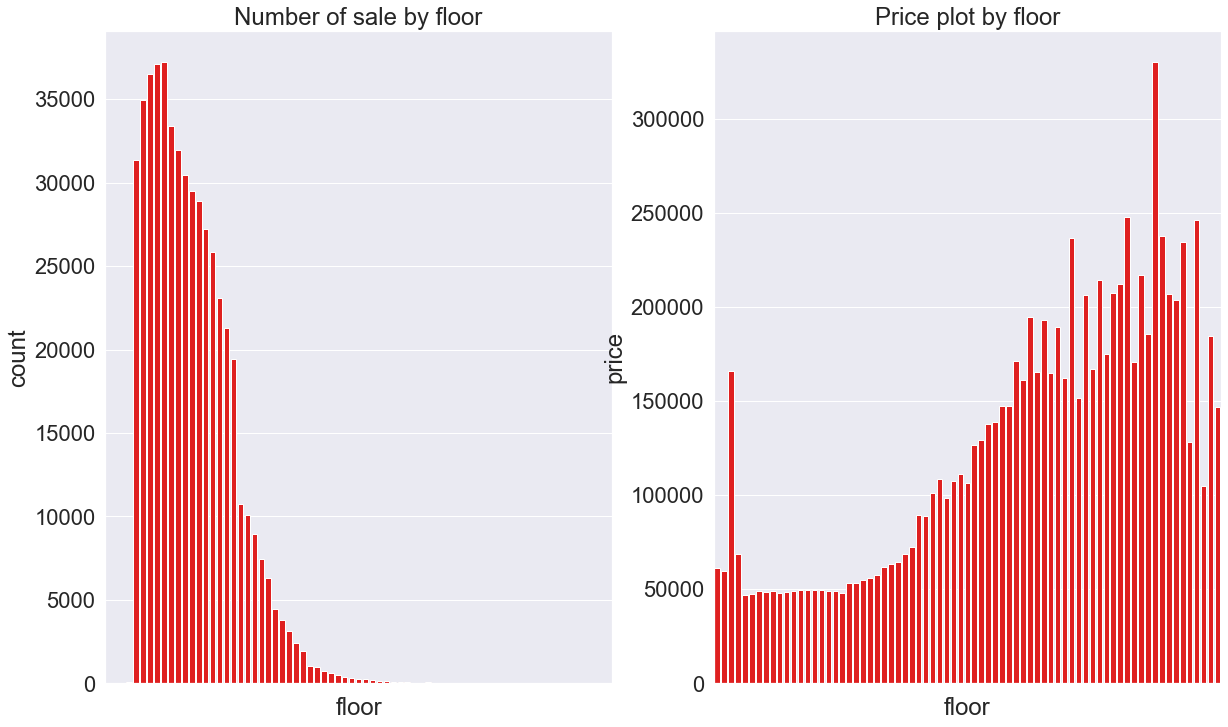

In [38]:
fig, axs = plt.subplots(ncols = 2, figsize = (20,12))
sns.countplot(data = data , 
              x="floor", ax=axs[0], color = "red"
             ).set(title = "Number of sale by floor", xticklabels=[])
sns.barplot(data = data, 
            x="floor", y = "price", 
            ax=axs[1], color = "red", ci = None
           ).set(title = "Price plot by floor", xticklabels=[])

오른쪽 플랏을 통해 건물의 층고가 높아질수록 가격이 상승하는 경향을 보이는 것을 알 수 있다.하지만 건물의 층고가 높다고 해서 무조건적으로 가격이 높게 형성되는 것은 아니다. 또한 대부분의 건물은 상대적으로 층고가 낮은 곳에 속해 있어 층고가 높은 건물들의 가격은 전체 평균 가격에 크게 영향을 미칠 듯 하다.


### 2.4 완공연도별 거래량 분포 / 완공연도별 가격 분포

[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, ''),
  Text(12, 0, ''),
  Text(13, 0, ''),
  Text(14, 0, ''),
  Text(15, 0, ''),
  Text(16, 0, ''),
  Text(17, 0, ''),
  Text(18, 0, ''),
  Text(19, 0, ''),
  Text(20, 0, ''),
  Text(21, 0, ''),
  Text(22, 0, ''),
  Text(23, 0, ''),
  Text(24, 0, ''),
  Text(25, 0, ''),
  Text(26, 0, ''),
  Text(27, 0, ''),
  Text(28, 0, ''),
  Text(29, 0, ''),
  Text(30, 0, ''),
  Text(31, 0, ''),
  Text(32, 0, ''),
  Text(33, 0, ''),
  Text(34, 0, ''),
  Text(35, 0, ''),
  Text(36, 0, ''),
  Text(37, 0, ''),
  Text(38, 0, ''),
  Text(39, 0, ''),
  Text(40, 0, ''),
  Text(41, 0, ''),
  Text(42, 0, ''),
  Text(43, 0, ''),
  Text(44, 0, ''),
  Text(45, 0, ''),
  Text(46, 0, ''),
  Text(47, 0, ''),
  Text(48, 0, ''),
  Text(49, 0, ''),
  Text(50, 0, ''),
  Text(51, 0, ''),
  Text(52, 0, ''),
  T

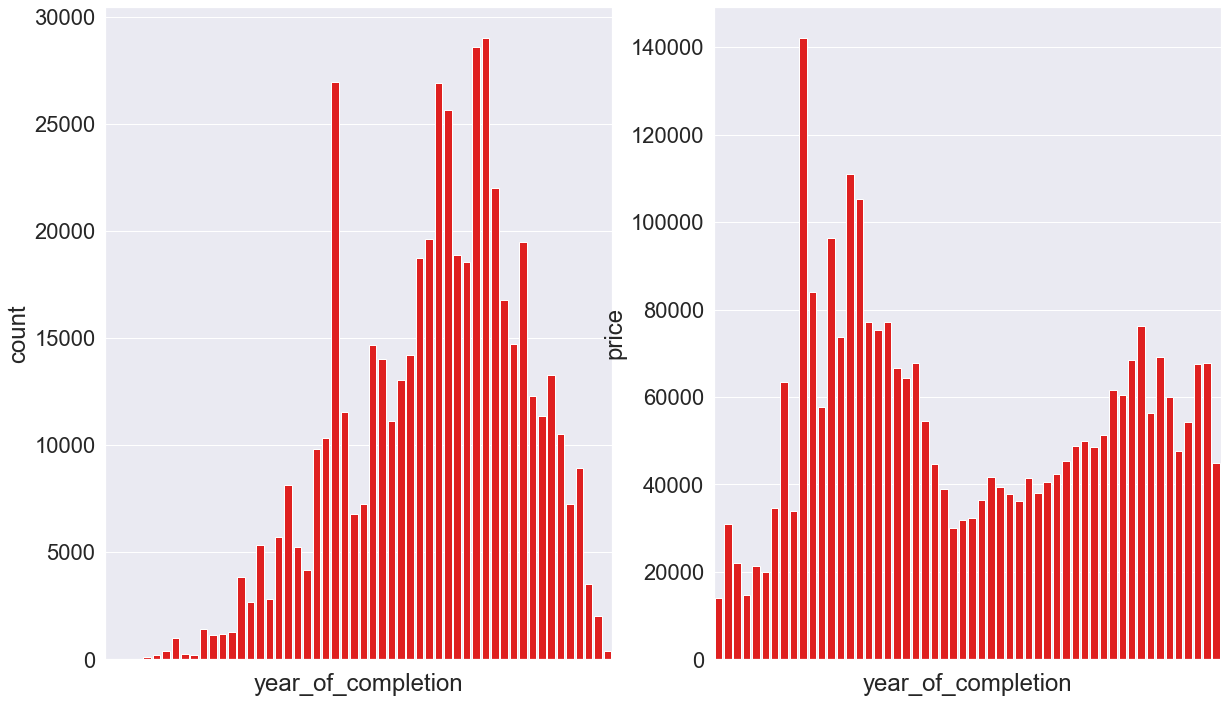

In [39]:
fig, axs = plt.subplots(ncols = 2, figsize = (20,12))
sns.countplot(data = data, 
              x = "year_of_completion", 
              ax=axs[0], color = "red"
             ).set(xticklabels=[])
sns.barplot(data = data,
            x = "year_of_completion", y="price", 
            ax=axs[1], color = "red", ci = None
           ).set(xticklabels=[])


오른쪽 플랏을 통해 완공 연도가 최근이라고 해서 더 비싸다고는 할 수 없다. 상대적으로 완공연도가 오래된 것들의 가격이 더 높게 형성되어 있다. 

완공연도가 비교적 최근인 것들의 매물이 더 많은데 이를 오른쪽 가격 그래프와 연관지어 생각해보면 공급의 초과로 가격이 낮게 형성되었을 수도 있다. 하지만 이 시기에 지어진 건물의 다른 특징(층고, 위치 등) 등을 고려해봐야 할 문제라고 생각한다.



## 3. 파생변수 생성

### 3.1 아파트 연차 변수 생성

In [40]:
data["until_trans"] = data["transaction_year"] - data["year_of_completion"] + 1

In [41]:
data.head()

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month,until_trans
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,2008,201201,1~10,6,70000,2012,1,5
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,2008,201201,11~20,11,100500,2012,1,5
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,2008,201201,11~20,1,65800,2012,1,5
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,2005,201201,1~10,8,30500,2012,1,8
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,2005,201201,21~31,15,30500,2012,1,8


[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, ''),
  Text(12, 0, ''),
  Text(13, 0, ''),
  Text(14, 0, ''),
  Text(15, 0, ''),
  Text(16, 0, ''),
  Text(17, 0, ''),
  Text(18, 0, ''),
  Text(19, 0, ''),
  Text(20, 0, ''),
  Text(21, 0, ''),
  Text(22, 0, ''),
  Text(23, 0, ''),
  Text(24, 0, ''),
  Text(25, 0, ''),
  Text(26, 0, ''),
  Text(27, 0, ''),
  Text(28, 0, ''),
  Text(29, 0, ''),
  Text(30, 0, ''),
  Text(31, 0, ''),
  Text(32, 0, ''),
  Text(33, 0, ''),
  Text(34, 0, ''),
  Text(35, 0, ''),
  Text(36, 0, ''),
  Text(37, 0, ''),
  Text(38, 0, ''),
  Text(39, 0, ''),
  Text(40, 0, ''),
  Text(41, 0, ''),
  Text(42, 0, ''),
  Text(43, 0, ''),
  Text(44, 0, ''),
  Text(45, 0, ''),
  Text(46, 0, ''),
  Text(47, 0, ''),
  Text(48, 0, ''),
  Text(49, 0, ''),
  Text(50, 0, ''),
  Text(51, 0, ''),
  Text(52, 0, ''),
  T

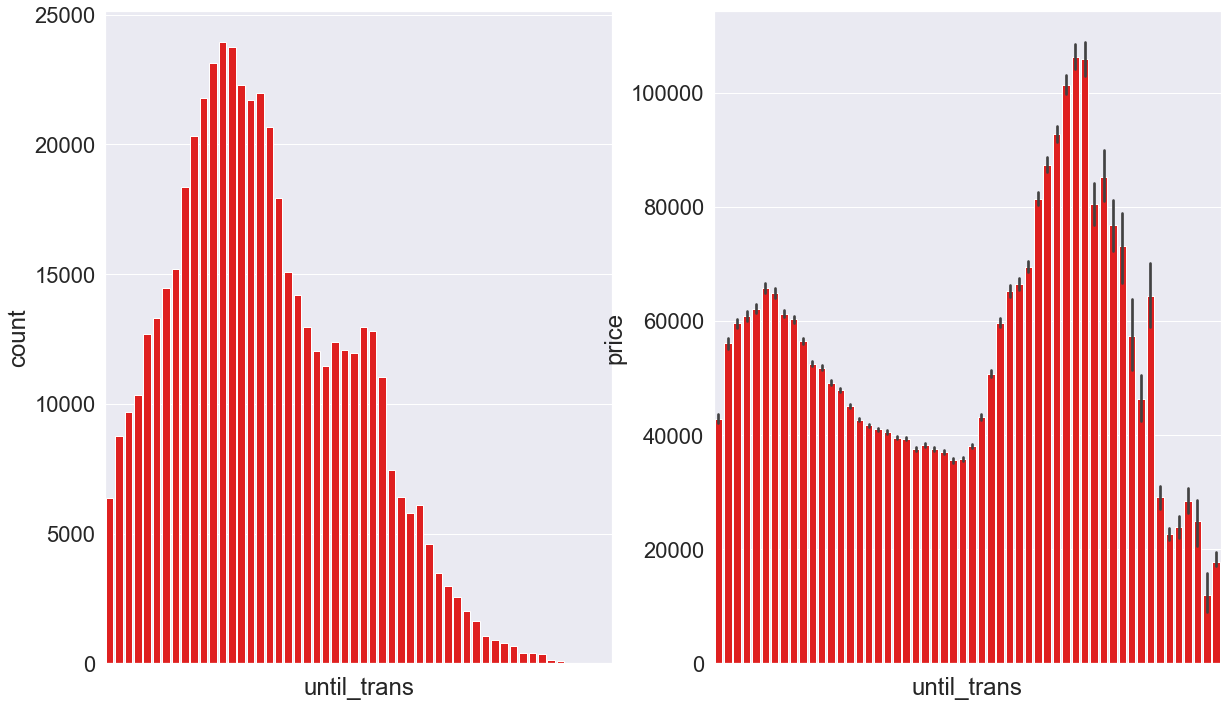

In [42]:
fig, axs = plt.subplots(ncols = 2, figsize = (20,12))
sns.countplot(data = data, 
              x="until_trans", 
              ax = axs[0], color = "red").set(xticklabels=[])
sns.barplot(data = data,
            x="until_trans", y = "price", 
            ax = axs[1], color = "red").set(xticklabels=[])

### 3.2 거래 일 변수 변환

In [43]:
data["transaction_date"] = np.where(data["transaction_date"] == "1~10", 
         0,
        np.where(data["transaction_date"] == "11~20", 1, 2))

### 3.3 월 변수와 10일 단위 변수 통합

In [152]:
data["transaction_month_date"] = 3*data.transaction_month + data.transaction_date

In [153]:
data[['transaction_month_date', 'transaction_month', 'transaction_date']]

,transaction_month_date,transaction_month,transaction_date
0,3,1,0
1,4,1,1
2,4,1,1
3,3,1,0
4,5,1,2
...,...,...,...
513523,34,11,1
513524,35,11,2
513525,35,11,2
513526,35,11,2


### 3.4 삼각변환

In [154]:
import math

In [155]:

data["sin_time"] = np.sin(2*np.pi * (data.transaction_month_date /4 ))
data["cos_time"] = np.cos(2*np.pi * (data.transaction_month_date) / 4)


In [ ]:
data.drop(["year_of_completion", "transaction_year_month", "transaction_date", "transaction_month", "transaction_month_date"], axis = 1, inplace = True)

사실 패키지 문제 밑에 삼각변환된 값이 나와 있어서 거기에 끼워 맞춰 답을 적어놓았습니다. 기존에 링크로 연결된 자료를 보고 생각했던 삼각변환은 일정한 주기를 갖는 함수를 그 주기로 나눠주는 변환을 취해주는 걸로 생각했습니다. 그래서 transaction_month_date를 unique한 값들의 길이인 35(주기)로 나누어줬었는데 이 방법은 안되는 걸까요..? 또는 365일을 10일 단위로 나누어 표현했기에 나누는 값에 36.5나 36도 생각해봤었는데 지식이 부족하여 뭐가 적절한지는 아직 잘 모르겠습니다... 
저렇게 4로 나누어도 주기성을 표현할 수 있는지 궁금합니다~!
아 그리고 패키지 문제 너무 친절하게 설명해주셔서 감사합니다!!!!

### 3.5 삼각변환을 통한 장점

원핫 인코딩이나 레이블 인코딩을 한다면 위 자료의 특징인 주기성을 반영하지 못합니다.
반면 삼각변환을 이용한다면 자료가 주기성을 반영하기 때문에 시계열적 특징을 갖는 변수에 유용할 것으로 생각됩니다.

## 4. 텍스트 데이터 다루기

### 4.1 아파트 이름 한글부분만 뽑기

In [117]:
apt = data['apt']
apt = apt.str.replace(pat=r'[^\w]', repl=r'', regex=True) 
apt = apt.str.replace(pat=r'[\d]', repl=r'', regex=True) 
apt.head()

0    광화문풍림스페이스본
1    광화문풍림스페이스본
2    광화문풍림스페이스본
3      로얄팰리스스위트
4      로얄팰리스스위트
Name: apt, dtype: object

### 4.2 아파트 이름 DTM

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [119]:
ct_vectorizer = CountVectorizer(min_df = 5)
apt_count = ct_vectorizer.fit_transform(apt)
print(apt_count.toarray())
apt_count.toarray().shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(513528, 4048)

### 4.3 아파트 이름 tf-idf

In [118]:
tf_vectorizer = TfidfVectorizer(min_df = 5)
apt_tfidf = tf_vectorizer.fit_transform(apt)
print(apt_tfidf.toarray())
apt_tfidf.toarray().shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(513528, 4048)


### 4.4 

단어의 빈도수를 기반으로 단어 문서 행렬을 만들어 원래의 데이터프레임에 붙여 분석/모델링을 진행한다면 우선 차원이 증가하는 문제가 발생합니다. 단어 문서 행렬로 변환한 값들에 서로 겹치지 않는 단어가 많다면 차원이 급격히 증가하고, 공간의 낭비가 심해집니다. 대부분의 원소가 0인 sparse한 행렬이 만들어지게 됩니다. 이를 dense한 행렬도 만듦으로써 해결할 수 있습니다.

## 5. 인코딩

### 5.1 원핫 인코딩

In [28]:
data = data.drop(columns = ['addr_kr'])

In [44]:
data_onehot= pd.get_dummies(data[["dong", "apt"]], drop_first = True)
data_onehot.shape

(513528, 7092)

차원이 너무 비대하게 커져서 적절하지 못한 인코딩이라고 생각합니다

### 5.2 레이블 인코딩 - transaction_year

In [30]:
data["transaction_year"] = data["transaction_year"].astype("category").cat.codes

In [31]:
data.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_time,cos_time
0,사직동,광화문풍림스페이스본(9-0),95.88,6,70000,0,5,-1.000000e+00,-1.836970e-16
1,사직동,광화문풍림스페이스본(9-0),108.55,11,100500,0,5,-2.449294e-16,1.000000e+00
2,사직동,광화문풍림스페이스본(9-0),94.51,1,65800,0,5,-2.449294e-16,1.000000e+00
3,수송동,로얄팰리스스위트,42.87,8,30500,0,8,-1.000000e+00,-1.836970e-16
4,수송동,로얄팰리스스위트,39.67,15,30500,0,8,1.000000e+00,3.061617e-16


레이블 인코딩을 한다면 원래 자료가 가지고 있는 고유한 의미가 레이블 값으로 대체되어 그 의미를 잃어버리고 하나의 범주로서 역할한다는 것이 단점이라고 생각합니다.
하지만 연도는 레이블 인코딩을 거치더라도 레이블 값(숫자)가 전후관계를 보장해주기 때문에 이같은 인코딩은 적절하다 생각합니다.

### 5.3 레이블 인코딩

In [32]:
dong_label = data["dong"].astype("category").cat.codes
apt_label = data["apt"].astype("category").cat.codes
data_label = data
data_label["dong"] = dong_label
data_label["apt"] = apt_label

In [33]:
data_label.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_time,cos_time
0,130,805,95.88,6,70000,0,5,-1.000000e+00,-1.836970e-16
1,130,805,108.55,11,100500,0,5,-2.449294e-16,1.000000e+00
2,130,805,94.51,1,65800,0,5,-2.449294e-16,1.000000e+00
3,164,2042,42.87,8,30500,0,8,-1.000000e+00,-1.836970e-16
4,164,2042,39.67,15,30500,0,8,1.000000e+00,3.061617e-16


반대로 동과 아파트 이름에 대한 레이블 인코딩은 적절하지 않은 것 같습니다. 레이블 인코딩 시 값들이 숫자로 표현된다는 특징이 있는데, 이렇게 변환하게 된다면 문자열이 가진 고유의 의미를 잃어버리고 숫자 크기에 의해 순서가 생기기 때문에 자료를 탐색할 때나 모델을 학습할 때 단점으로 작용합니다. 그렇기에 이같은 인코딩은 부적절한 듯 합니다.

### 5.4 mean 인코딩

In [34]:
data_mean = data_label
apt_mean = data_mean.groupby(["apt"])["price"].mean().to_dict()
data_mean["apt"] = data_label["apt"].map(apt_mean)
data_mean.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_time,cos_time
0,130,91174.766355,95.88,6,70000,0,5,-1.000000e+00,-1.836970e-16
1,130,91174.766355,108.55,11,100500,0,5,-2.449294e-16,1.000000e+00
2,130,91174.766355,94.51,1,65800,0,5,-2.449294e-16,1.000000e+00
3,164,36609.649123,42.87,8,30500,0,8,-1.000000e+00,-1.836970e-16
4,164,36609.649123,39.67,15,30500,0,8,1.000000e+00,3.061617e-16


mean 인코딩의 장점은 label 인코딩이나 onehot 인코딩과 달리 값 자체가 특정한 의미를 갖는다는 것이다. 타겟 값에 대해 각각의 범주형 변수의 label 값을 평균내어 label값으로 대체하기 때문에 타겟 값과 관계가 있다고 할 수 있다. 이 같은 인코딩 방법은 비교적 빠른 학습 속도로 이어진다는 장점 또한 있다. 

하지만 training 데이터의 타겟 값의 영향을 받기 때문에 training 데이터와 test 데이터의 타겟 값 분포가 상당히 다르다면 training 데이터에만 잘 적합하는 오버피팅이 발생할 수 있다는 단점이 있다.

하지만 onehot인코딩은 차원이 너무 늘어나고, label인코딩은 자료의 고유한 특성을 반영하지 못한다는 단점이 존재하고 mean 인코딩은 이런 단점을 보완할 수 있기 때문에 자연어처리를 따로 하지 않는다면 mean 인코딩은 적절한 방법이라 생각한다.